<a href="https://colab.research.google.com/github/sriharshini13/IIITH_INTERNSHIP/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## YOLOv8 Training on AFRICAN WILDLIFE DATASET

This guide outlines the steps to train a YOLOv8 object detection model on a C Windows laptop, using the provided Ultralytics African Wildlife dataset.

### 1\. Initial Setup

  * **Install Python:** Download and run the latest 64-bit Windows installer from [python.org](https://www.python.org/downloads/windows/). **Crucially, check "Add Python.exe to PATH"** during installation. Verify with `python --version` in Command Prompt.
  * **Install VS Code:** Download and install from [code.visualstudio.com](https://code.visualstudio.com/).
  * **Install VS Code Extensions:** Open VS Code, go to Extensions (`Ctrl+Shift+X`), and install "Python" (by Microsoft) and optionally "Jupyter".

### 2\. Project Setup

  * **Create Project Folder:** Create a new folder, e.g., `C:\YOLO_African_Wildlife`.
  * **Open in VS Code:** `File > Open Folder...`, select your project folder.
  * **Create & Activate Virtual Environment:**
      * Open VS Code Terminal (`Ctrl+`).
      * Type: `python -m venv venv`
      * Type: `.\venv\Scripts\activate` (Verify `(venv)` appears in prompt).
  * **Install Ultralytics:**
      * With `(venv)` active, type: `pip install ultralytics`
      * Then: `pip install pycocotools`

### 3\. Dataset Preparation

  * **Download Dataset:** Download `african-wildlife.zip` directly from: [https://github.com/ultralytics/assets/releases/download/v0.0.0/african-wildlife.zip](https://github.com/ultralytics/assets/releases/download/v0.0.0/african-wildlife.zip)
  * **Extract Dataset:**
      * Create a `datasets` folder inside your `YOLO_African_Wildlife` project folder.
      * Move the downloaded `african-wildlife.zip` into `datasets`.
      * Right-click `african-wildlife.zip` and "Extract All..." or "Extract Here". This creates `datasets\african-wildlife`.
  * **Create `african_wildlife.yaml`:**
      * In VS Code Explorer, create a new file `african_wildlife.yaml` in your project root.
      * Paste and save this content:
        ```yaml
        path: ./datasets/african-wildlife
        train: images/train
        val: images/val
        test: images/test
        names:
          0: buffalo
          1: elephant
          2: rhino
          3: zebra
        ```

### 4\. Run Training (CPU Optimized)

  * **Create `train_model.py`:**
      * In VS Code Explorer, create a new file `train_model.py` in your project root.
      * Paste and save this content (optimized for CPU):
        ```python
        from ultralytics import YOLO
        import torch

        if __name__ == '__main__':
            print("Configuring training for CPU.")
            model = YOLO('yolov8n.pt') # Smallest model for basic laptops

            model.train(
                data='african_wildlife.yaml',
                epochs=15,    # Recommended: 10-15 epochs
                imgsz=320,    # Smaller image size for lower memory
                batch=2,      # Small batch size (try 1 if 'out of memory')
                device='cpu', # Force CPU training
                project='runs/detect_cpu_small',
                name='african_wildlife_run',
                workers=0     # For Windows compatibility
            )
            model.val() # Run final validation
            print(f"\nResults saved to: {model.trainer.save_dir}")
        ```
  * **Execute Training:**
      * Ensure `(venv)` is active in VS Code Terminal.
      * Type: `python train_model.py` (press Enter).
      * **Monitor:** Training will show progress in the terminal. Be patient, CPU training is slow.

### 5\. Interpret Results

  * **Locate Results:** After training, navigate to `C:\YOLO_African_Wildlife\runs\detect_cpu_small\african_wildlife_run` in File Explorer.
  * **Examine `.png` Images:**
      * **`confusion_matrix.png`:** Shows correct (diagonal) vs. incorrect (off-diagonal) classifications. Darker colors on diagonal are good.
      * **`P_curve.png`, `R_curve.png`, `F1_curve.png` (Precision, Recall, F1-score vs. Confidence):**
          * X-axis: Model confidence (0-1). Y-axis: Metric.
          * Higher curves mean better performance. F1 peak indicates optimal balance.
      * **`results.png` (Training Metrics Over Epochs):**
          * X-axis: Epoch. Y-axis: Metric/Loss.
          * **Losses (e.g., `box_loss`):** Should **decrease**.
          * **Metrics (e.g., `mAP50`, `mAP50-95`):** Should **increase**.
          * If validation metrics decrease while training loss decreases, it suggests **overfitting**.
      * **`val_batchX_pred.jpg` (Prediction Examples):** Visualizes detections. Green boxes are correct. Look for missed objects (False Negatives) or incorrect boxes (False Positives/Misclassifications).

-----

6. RESULTS

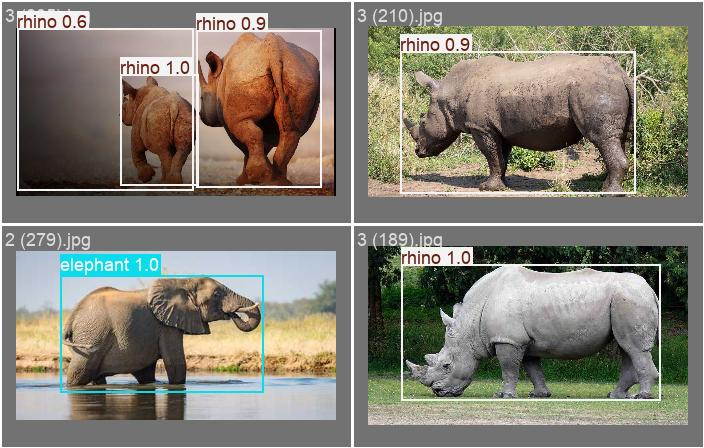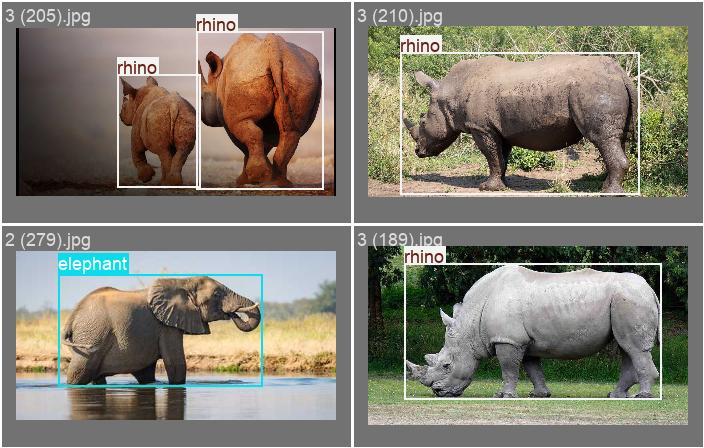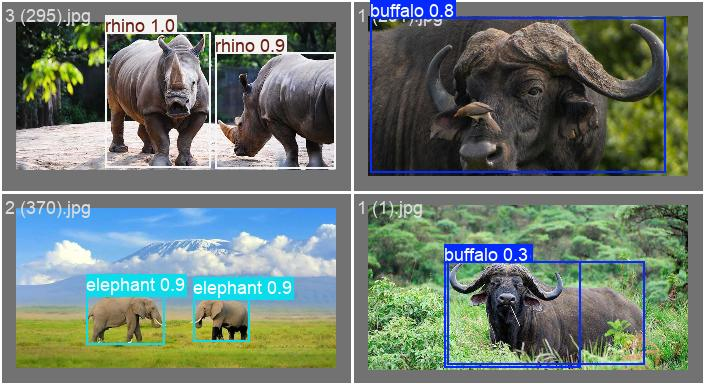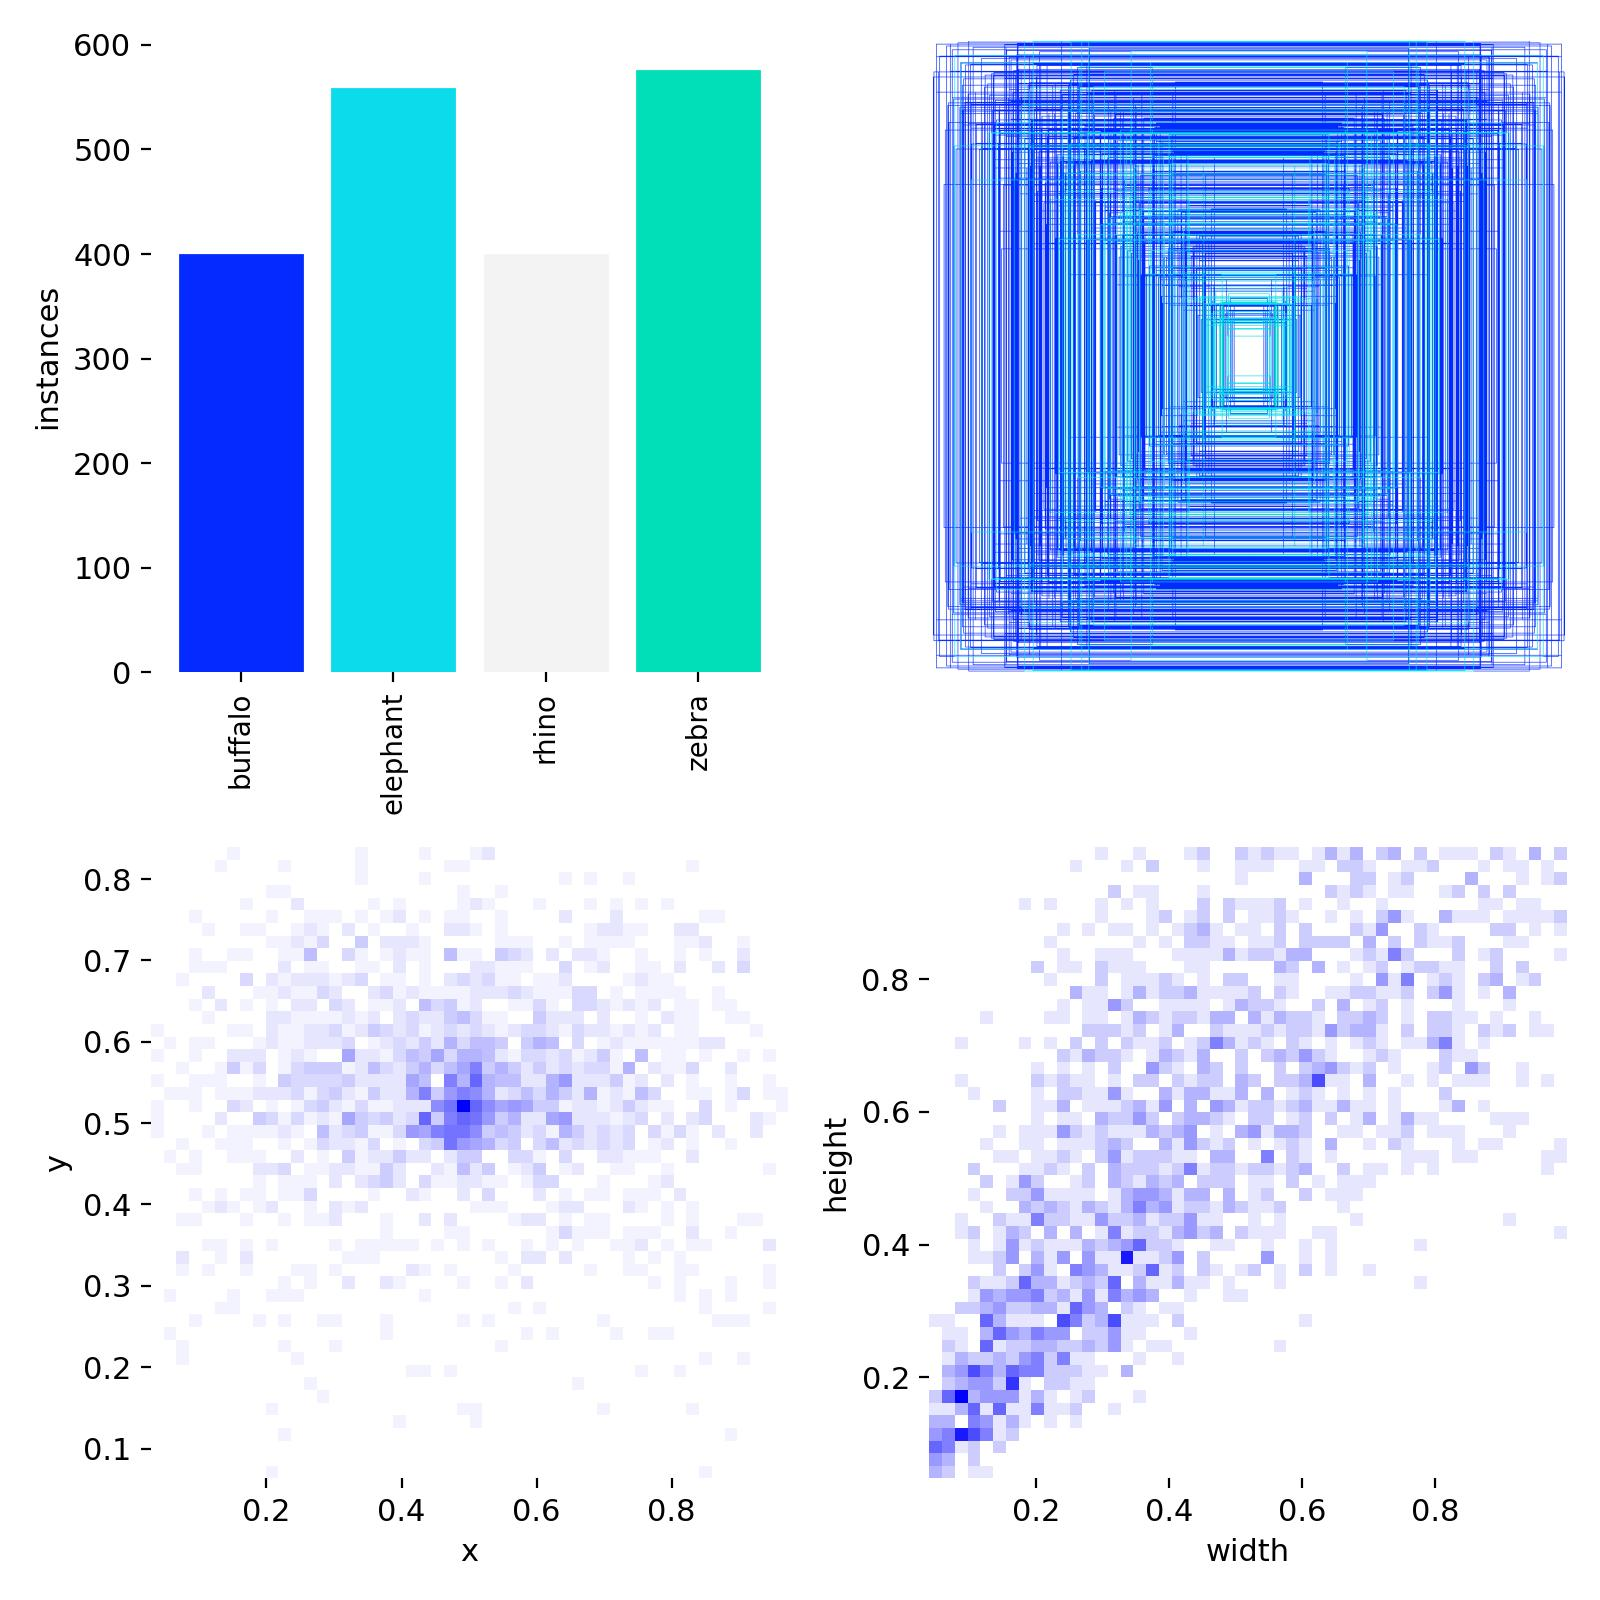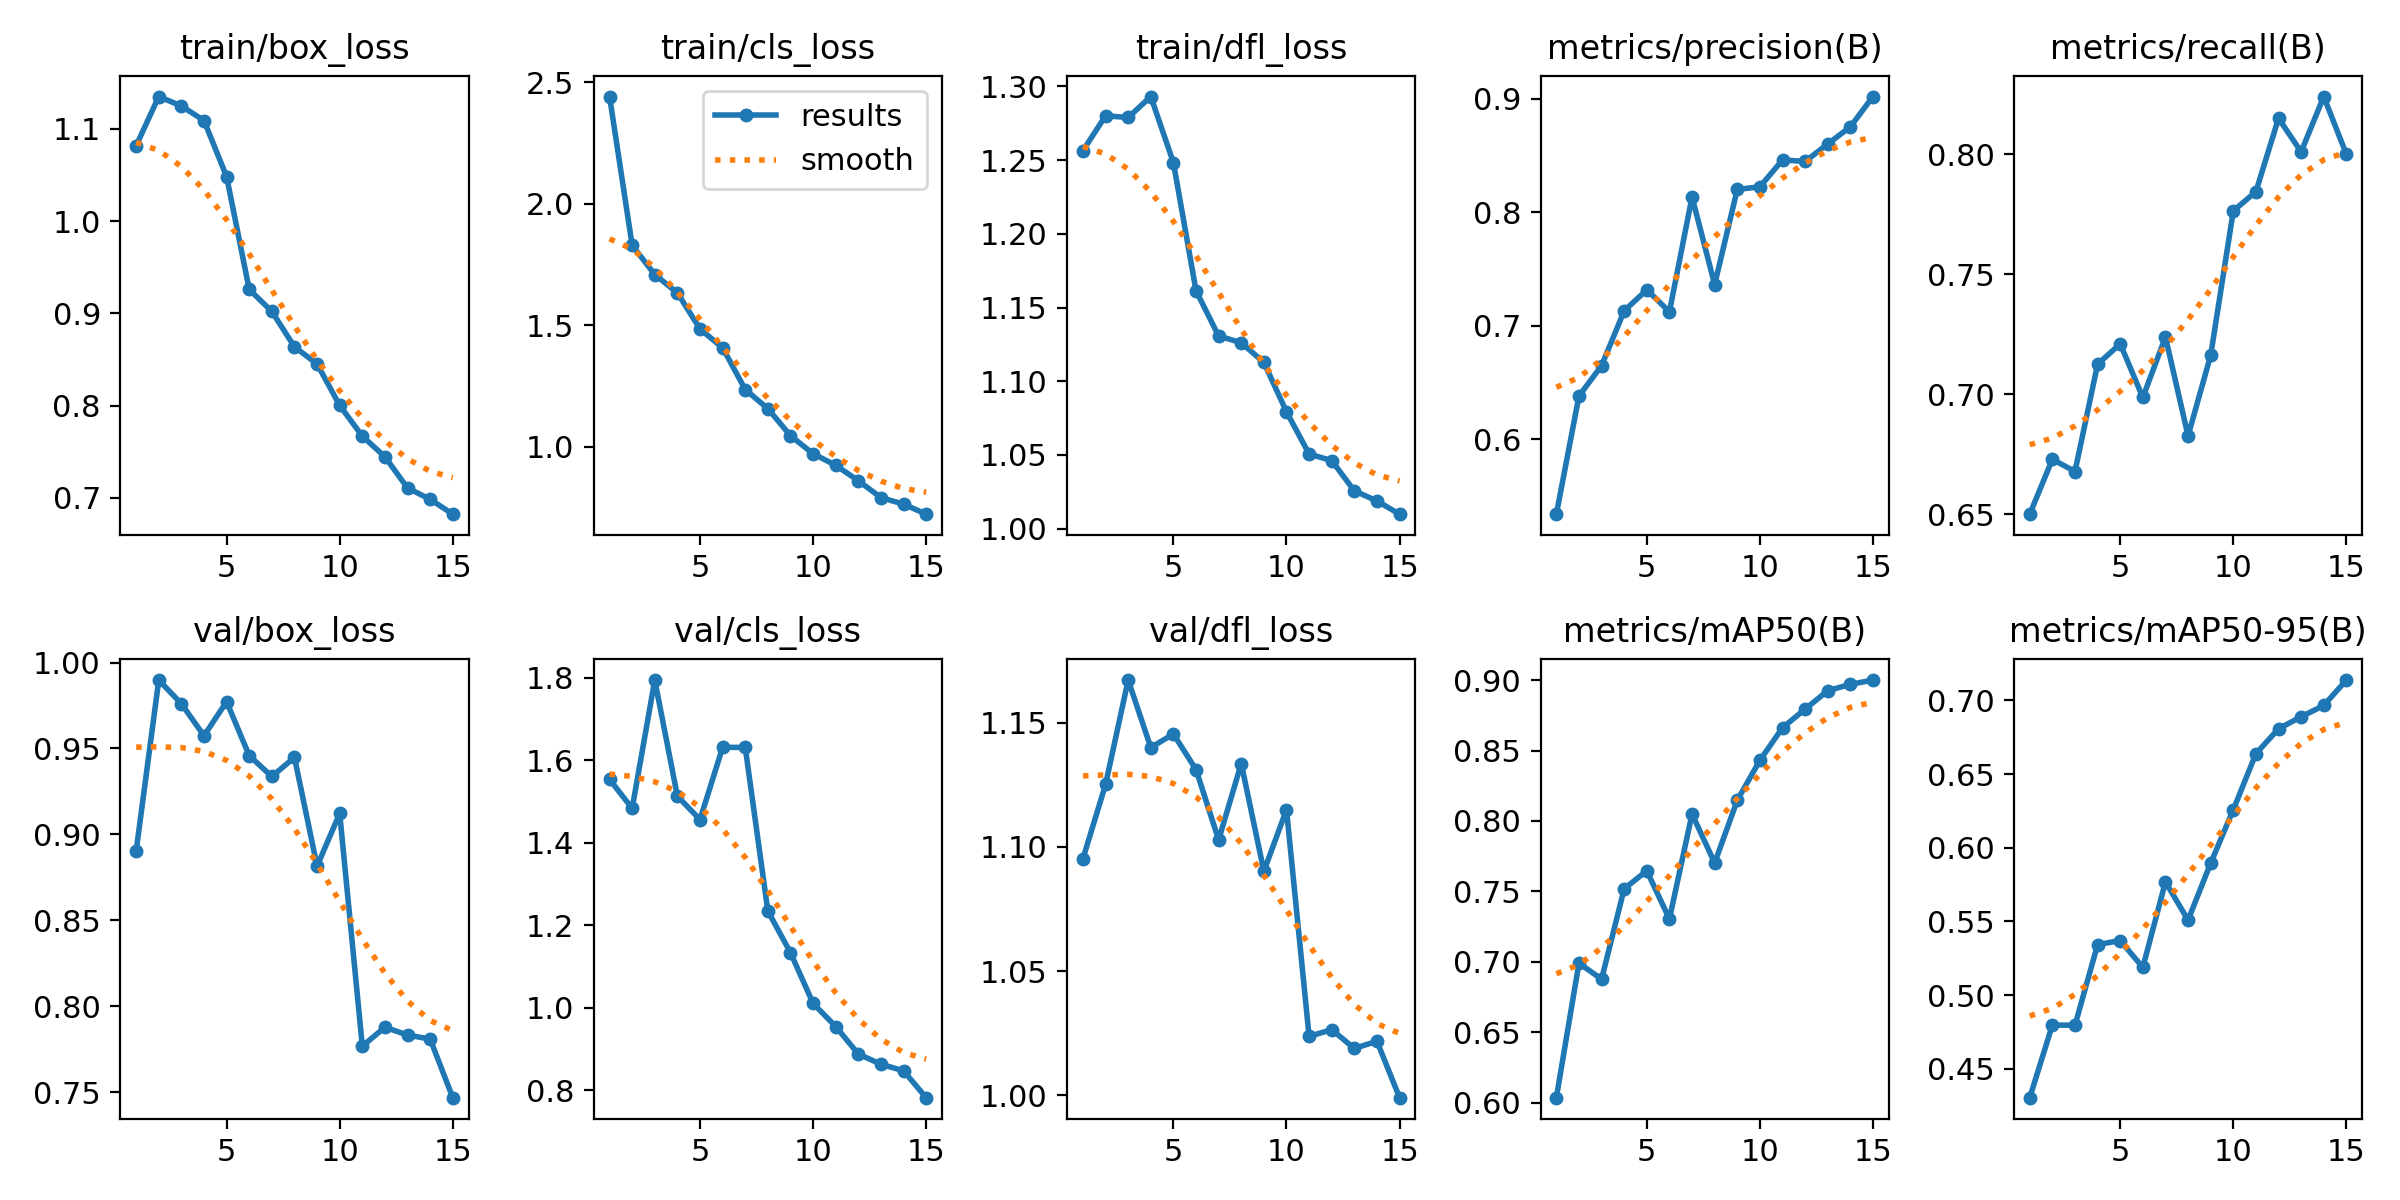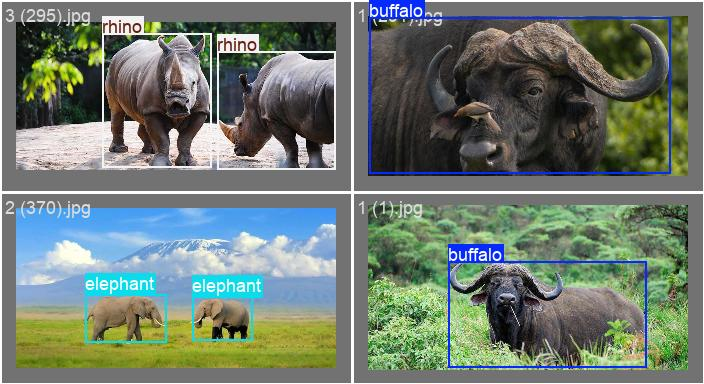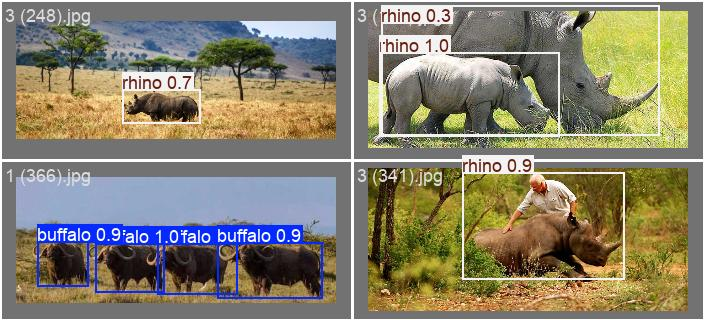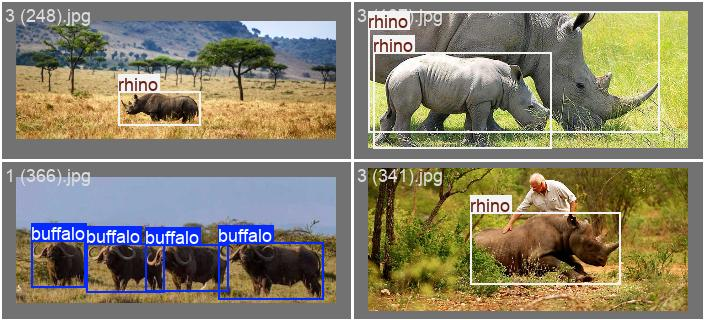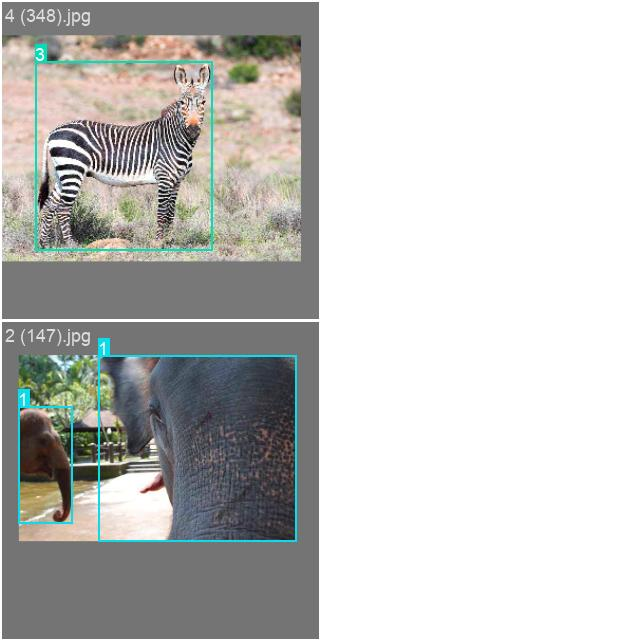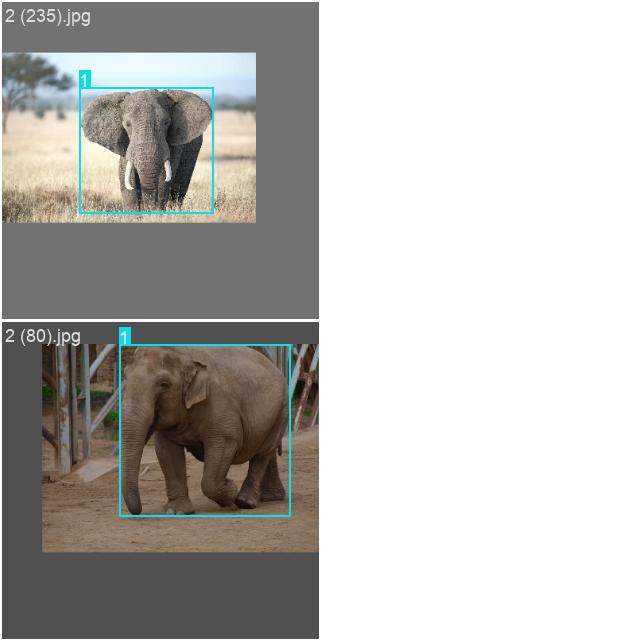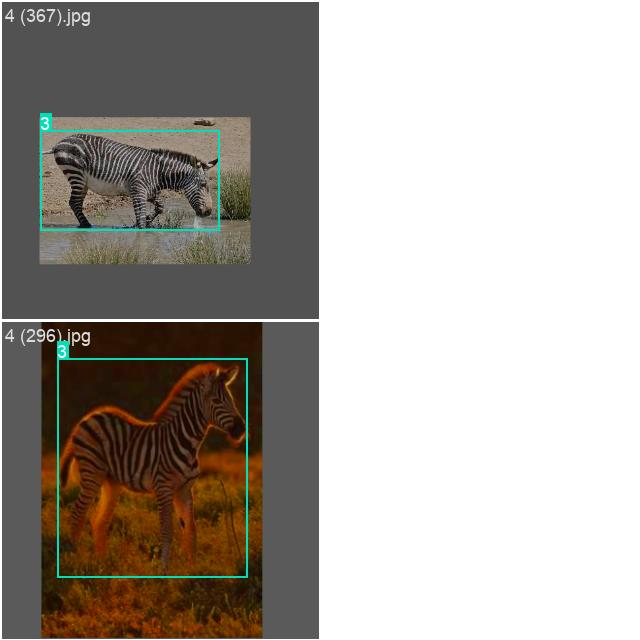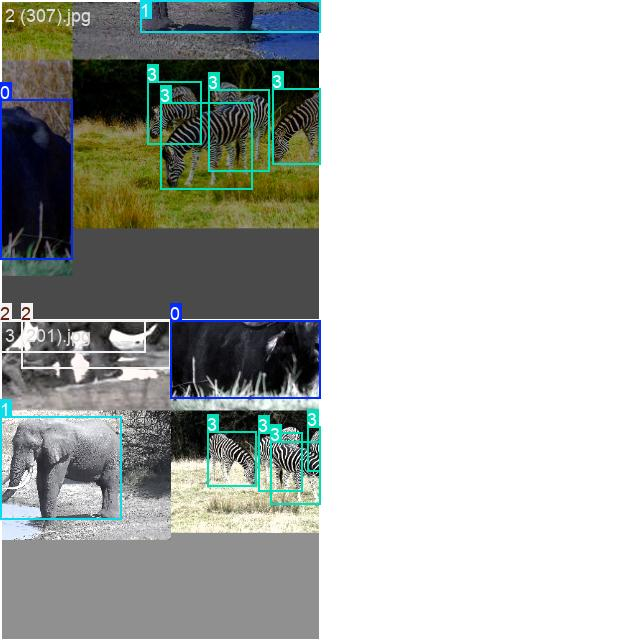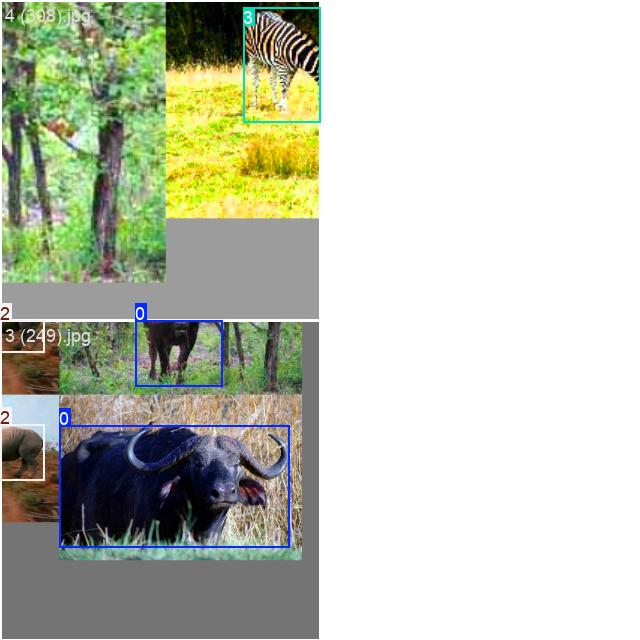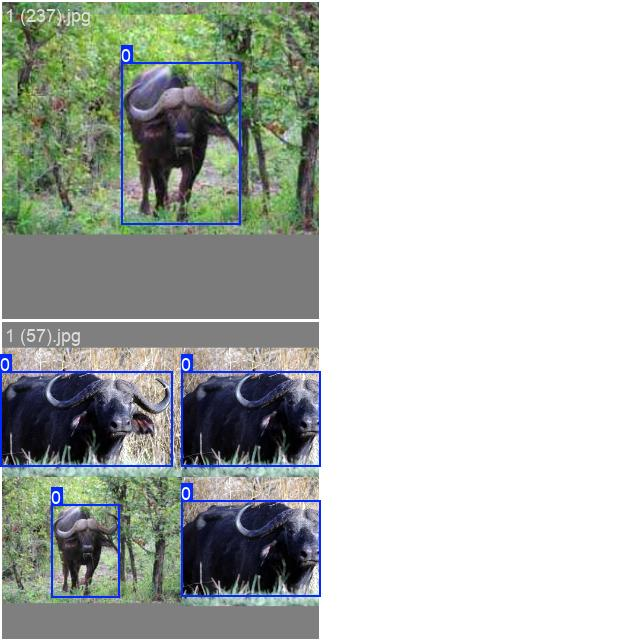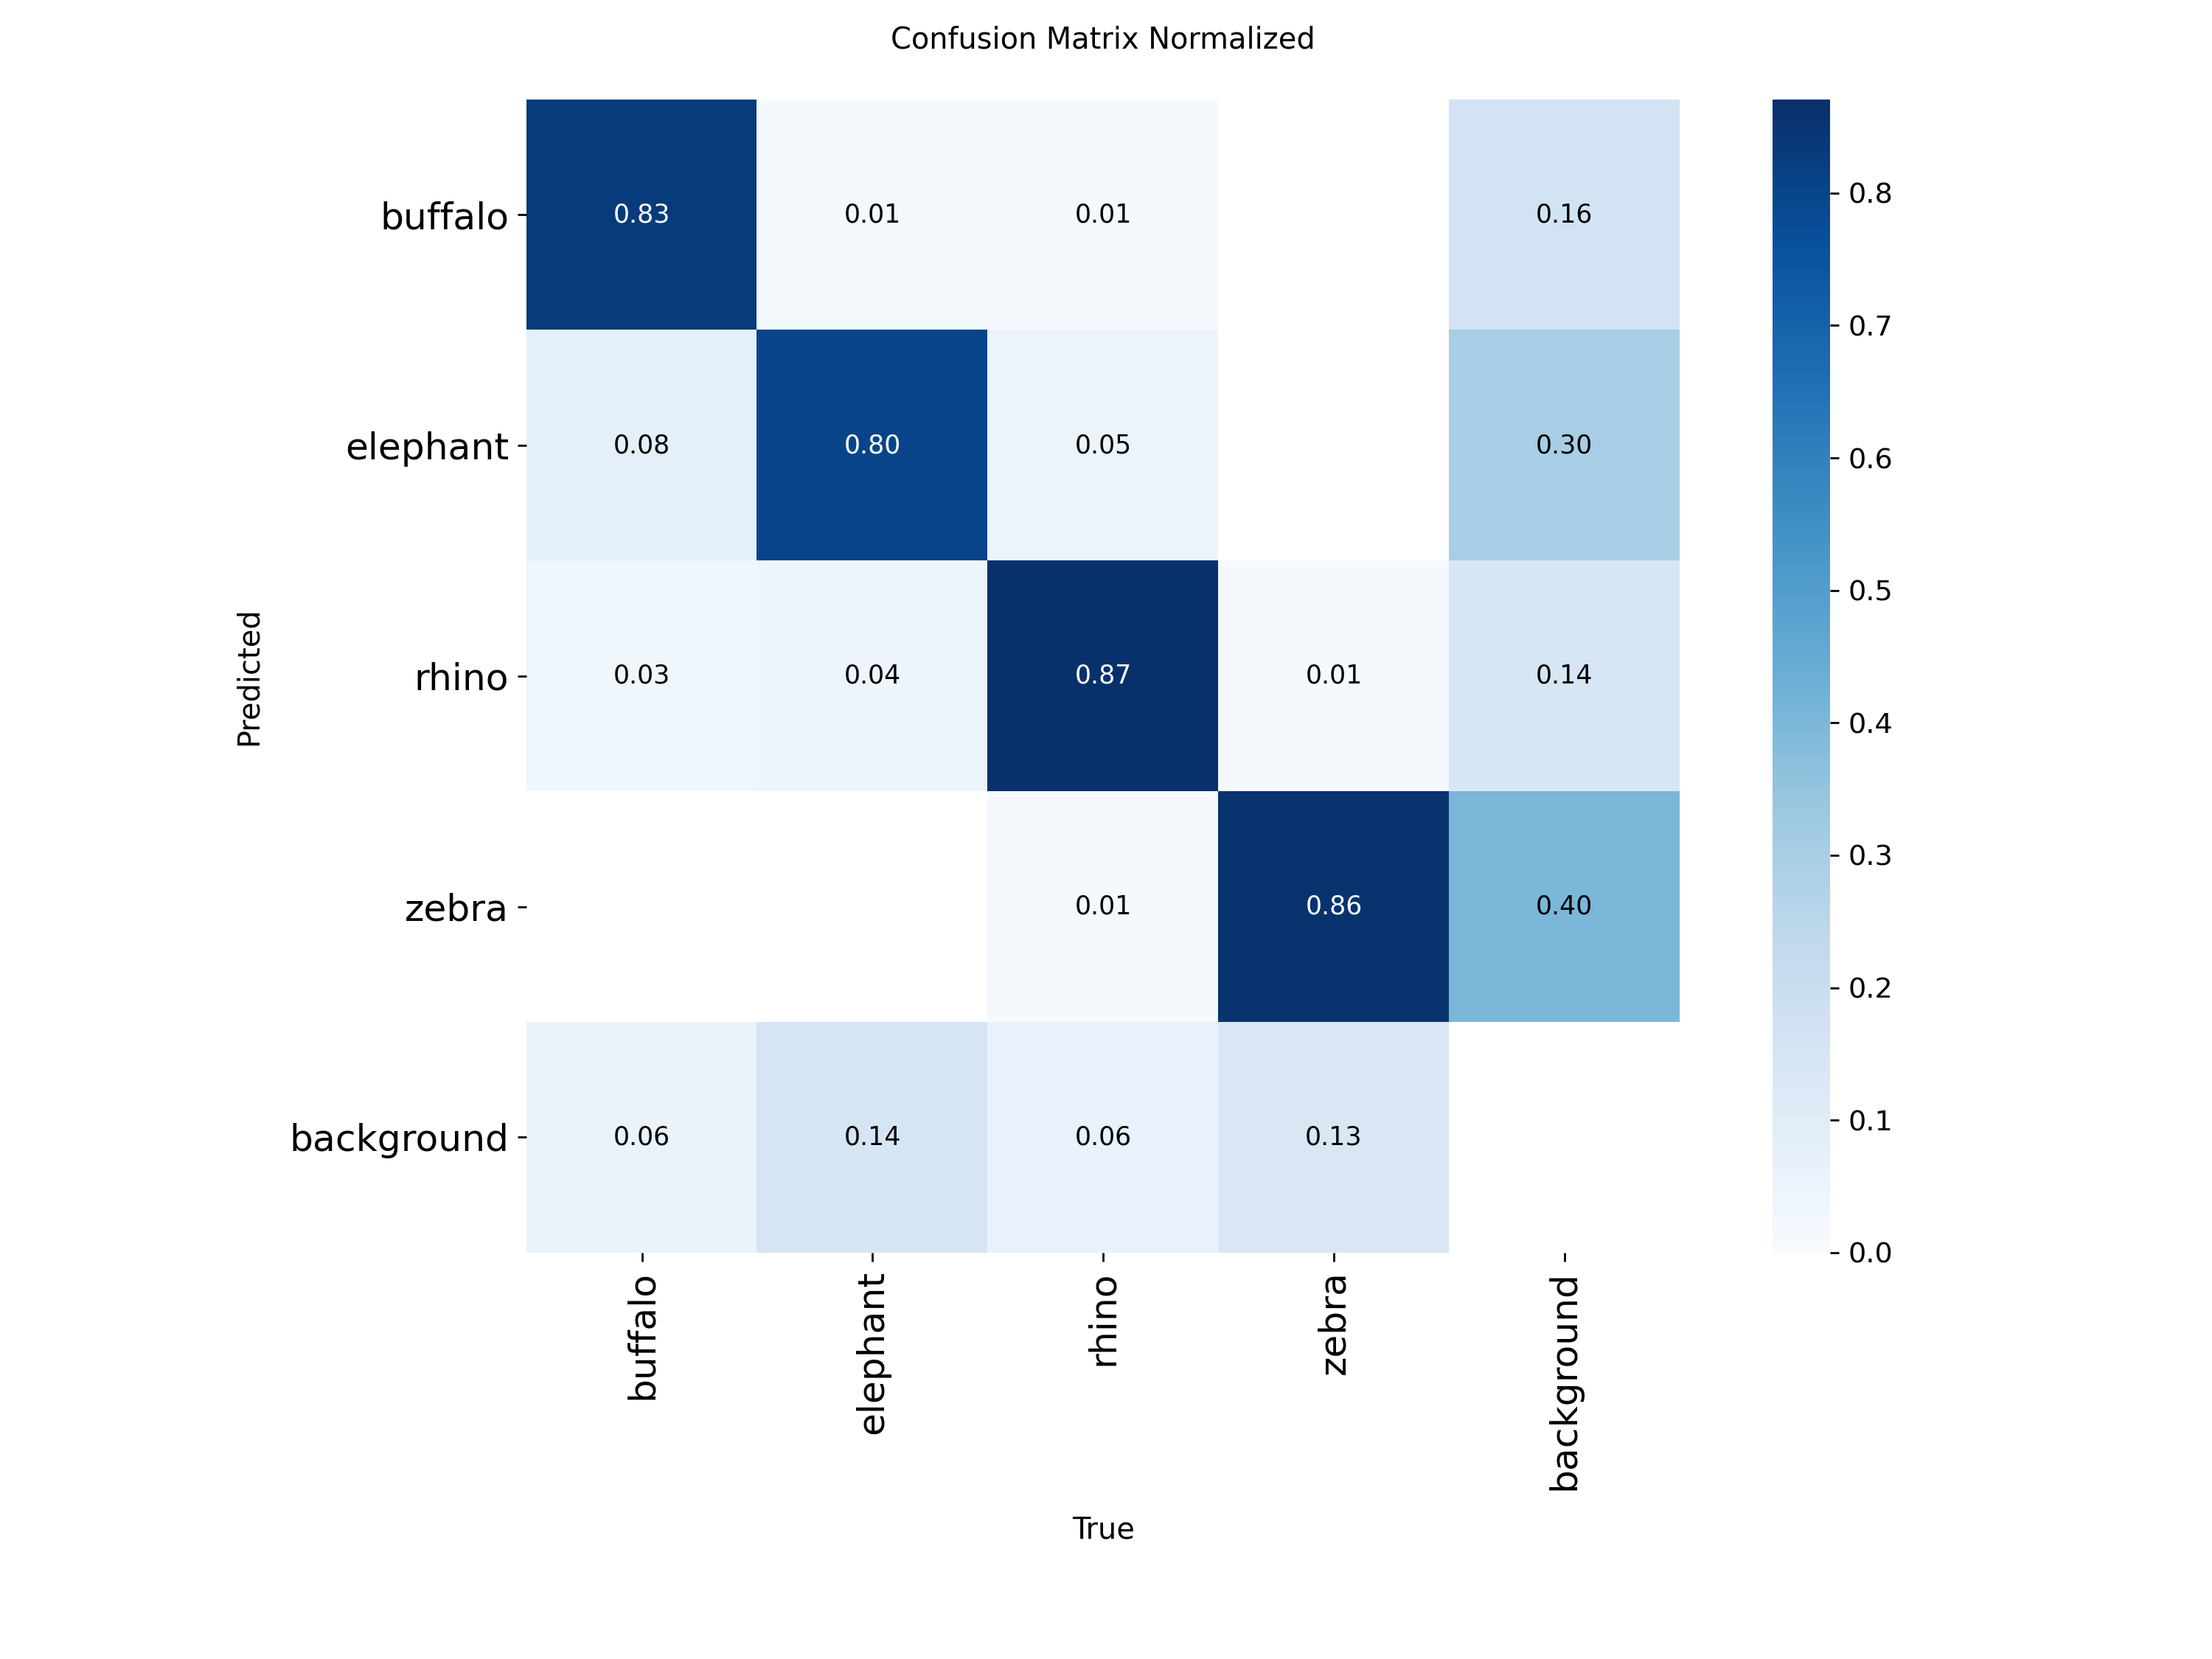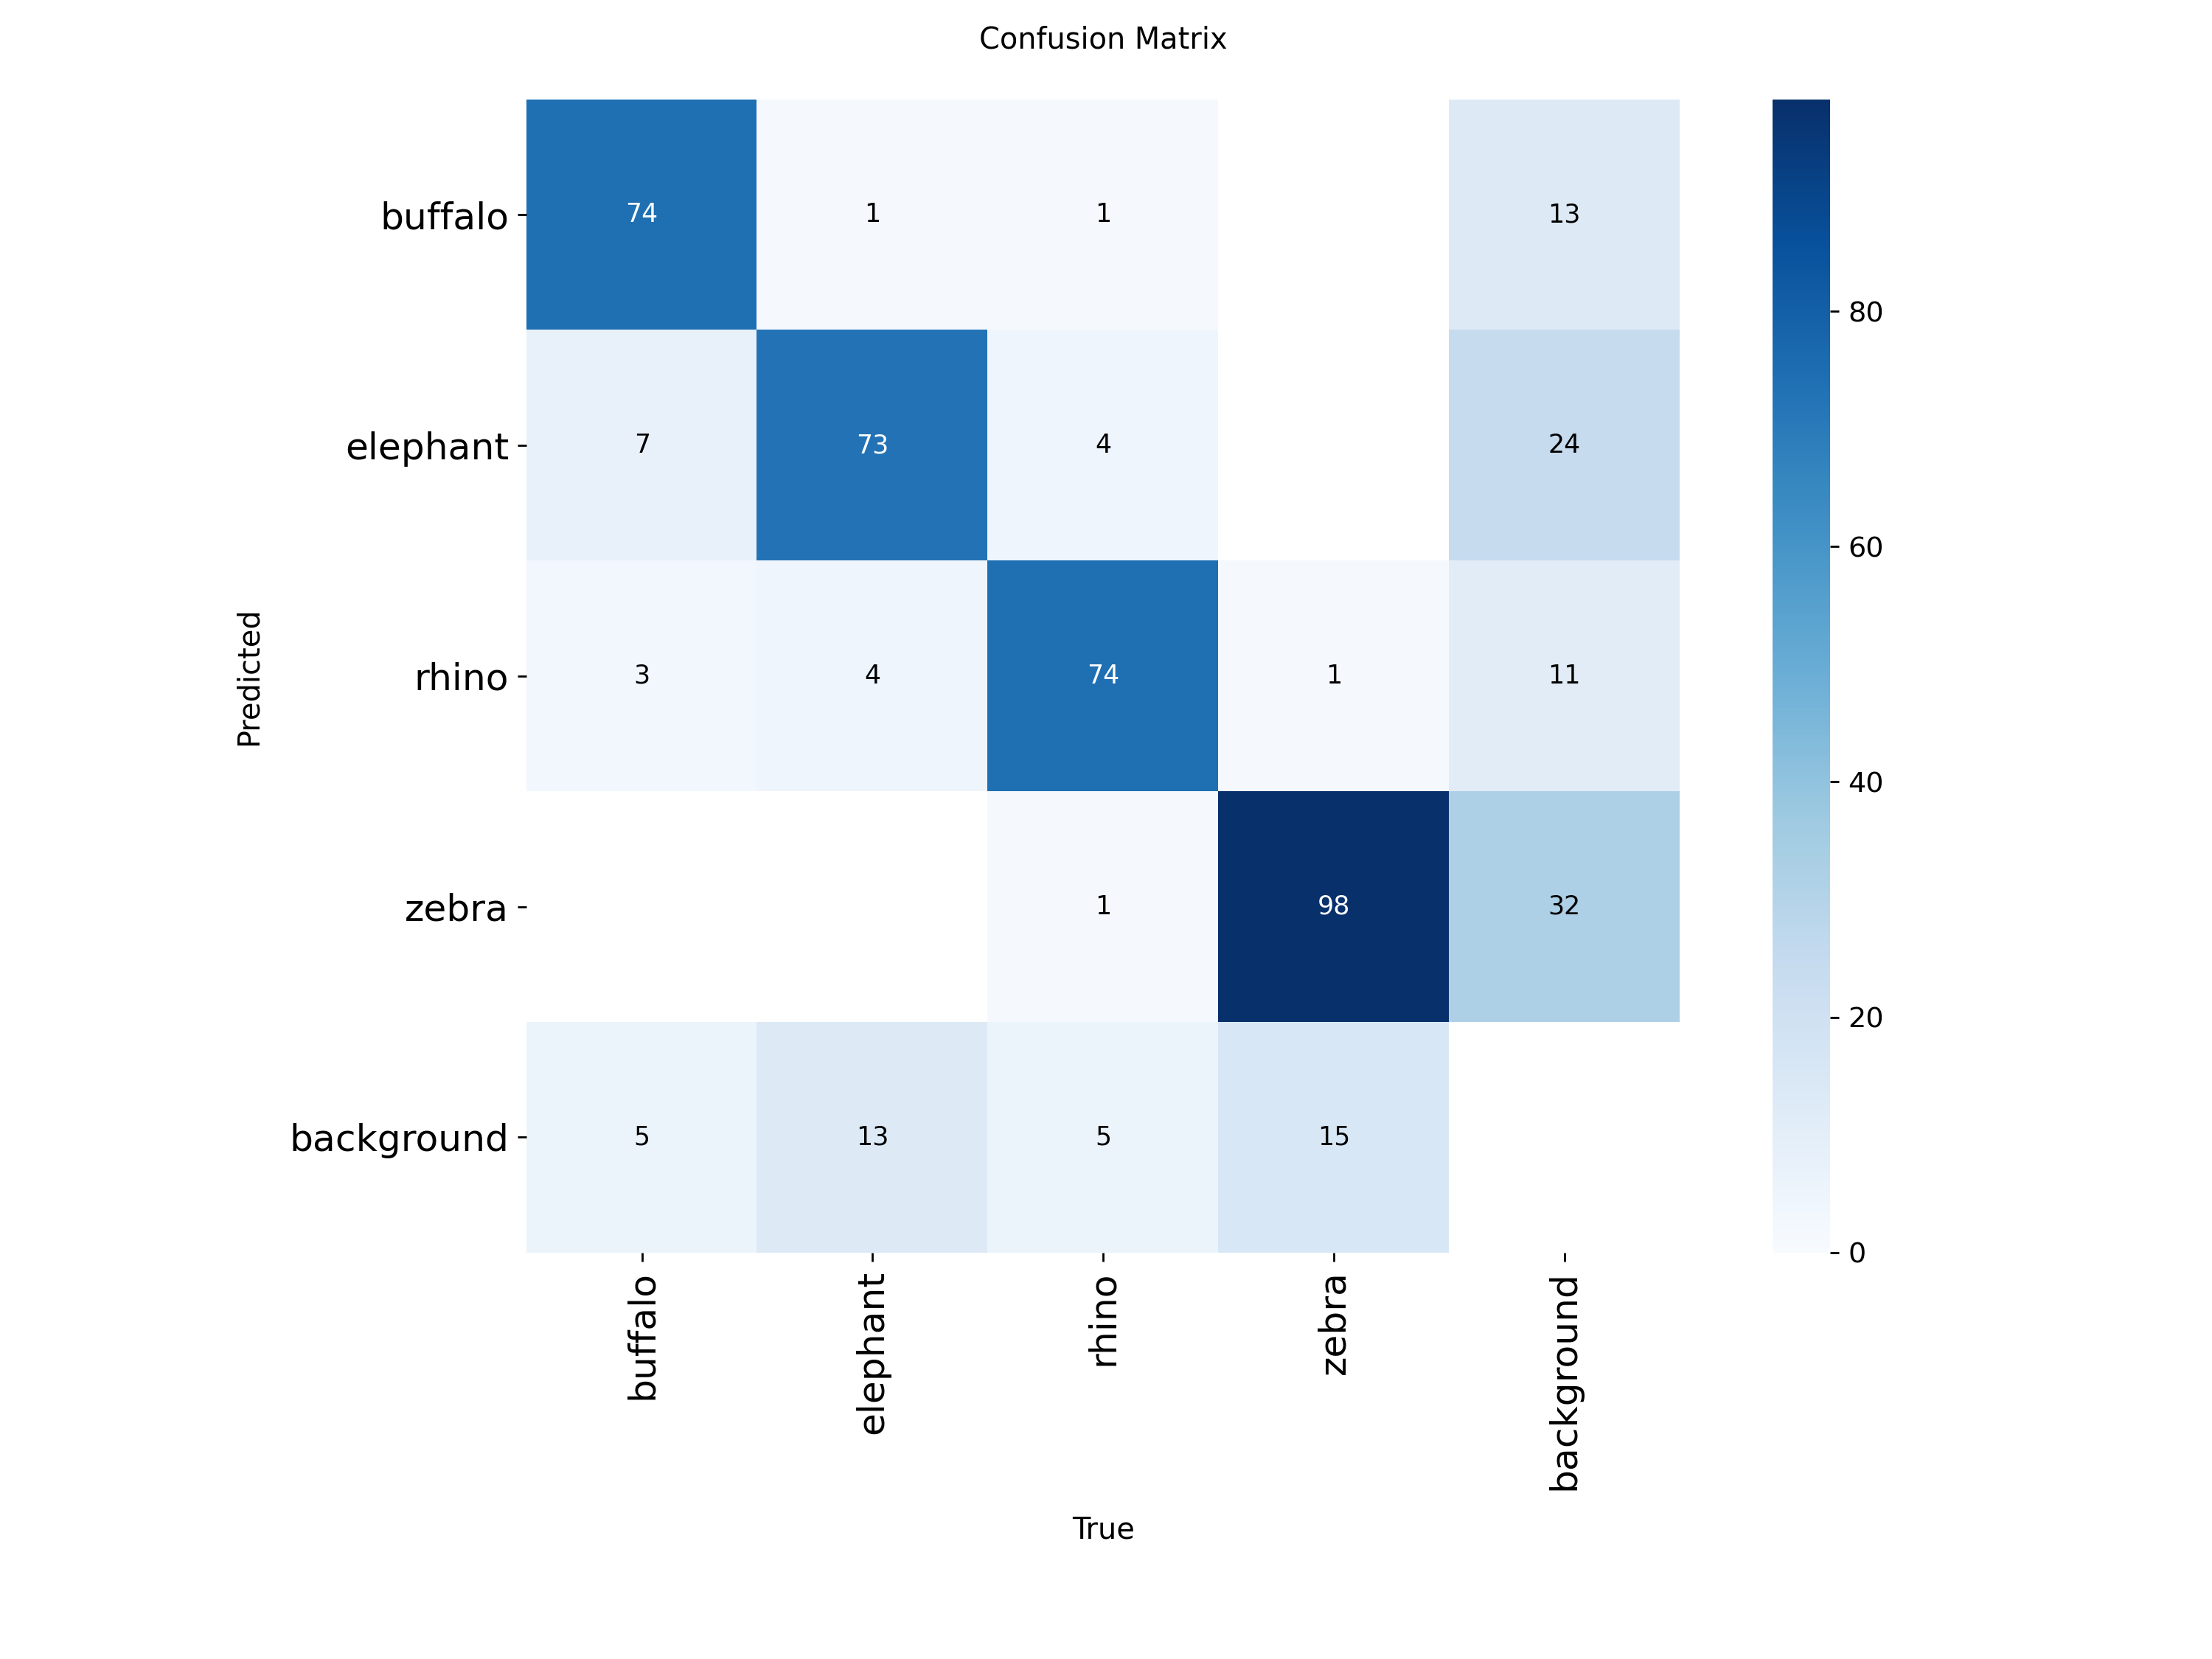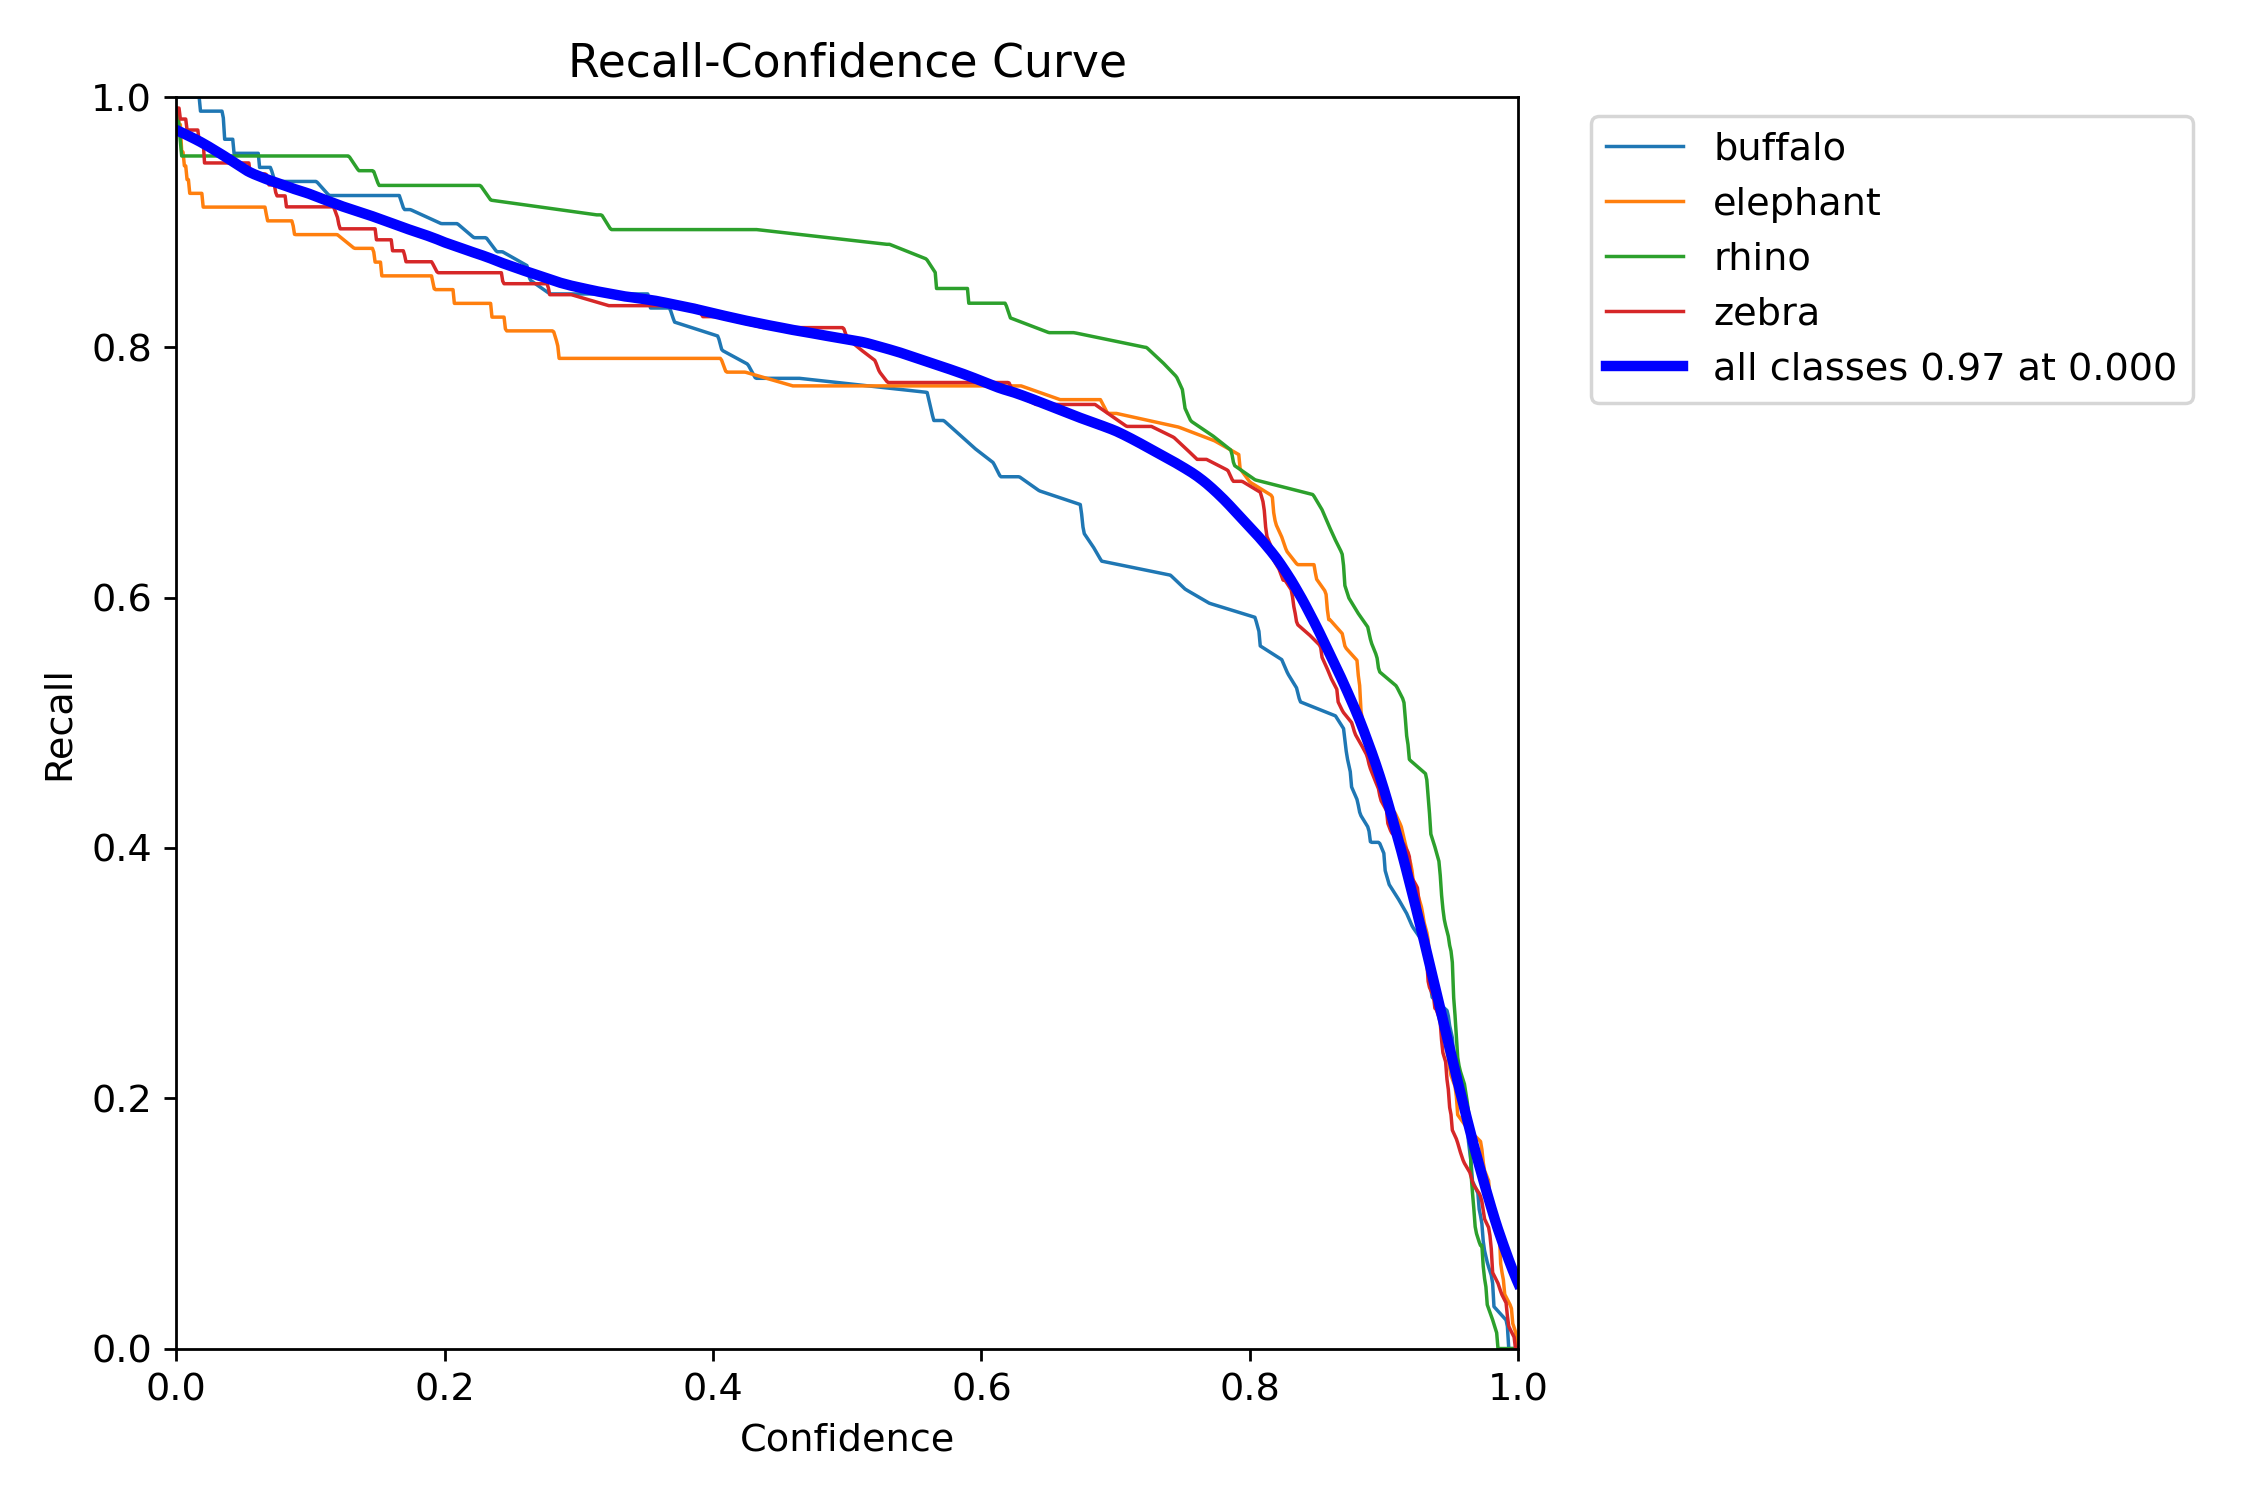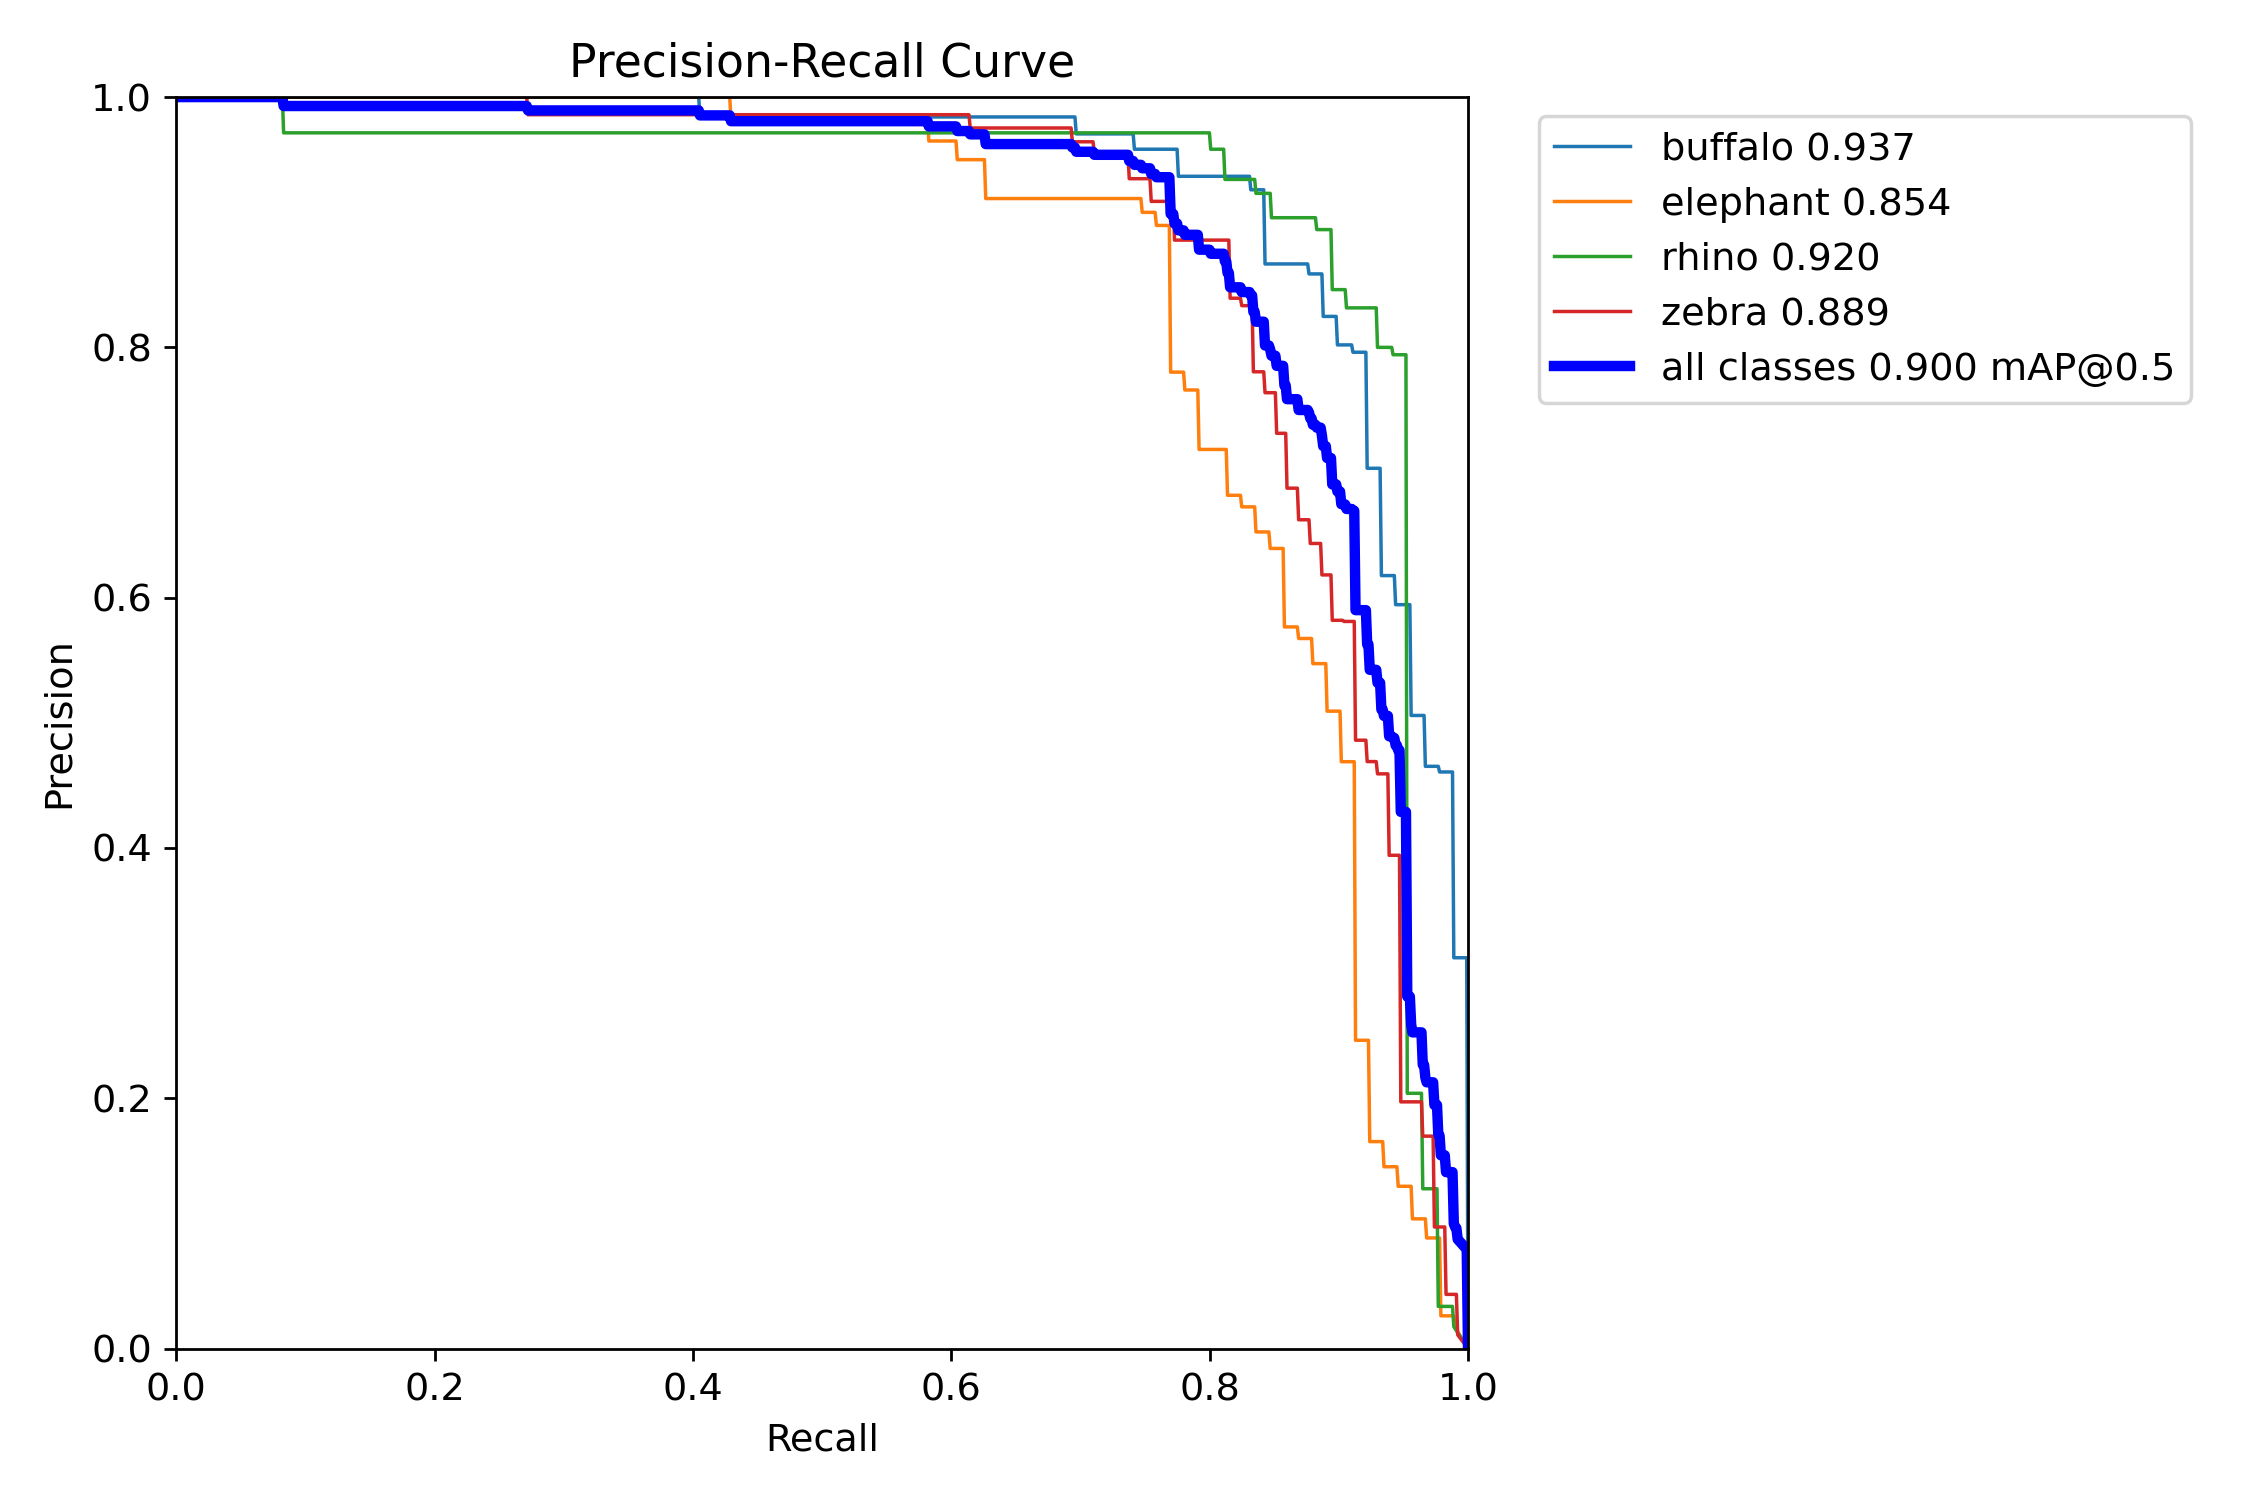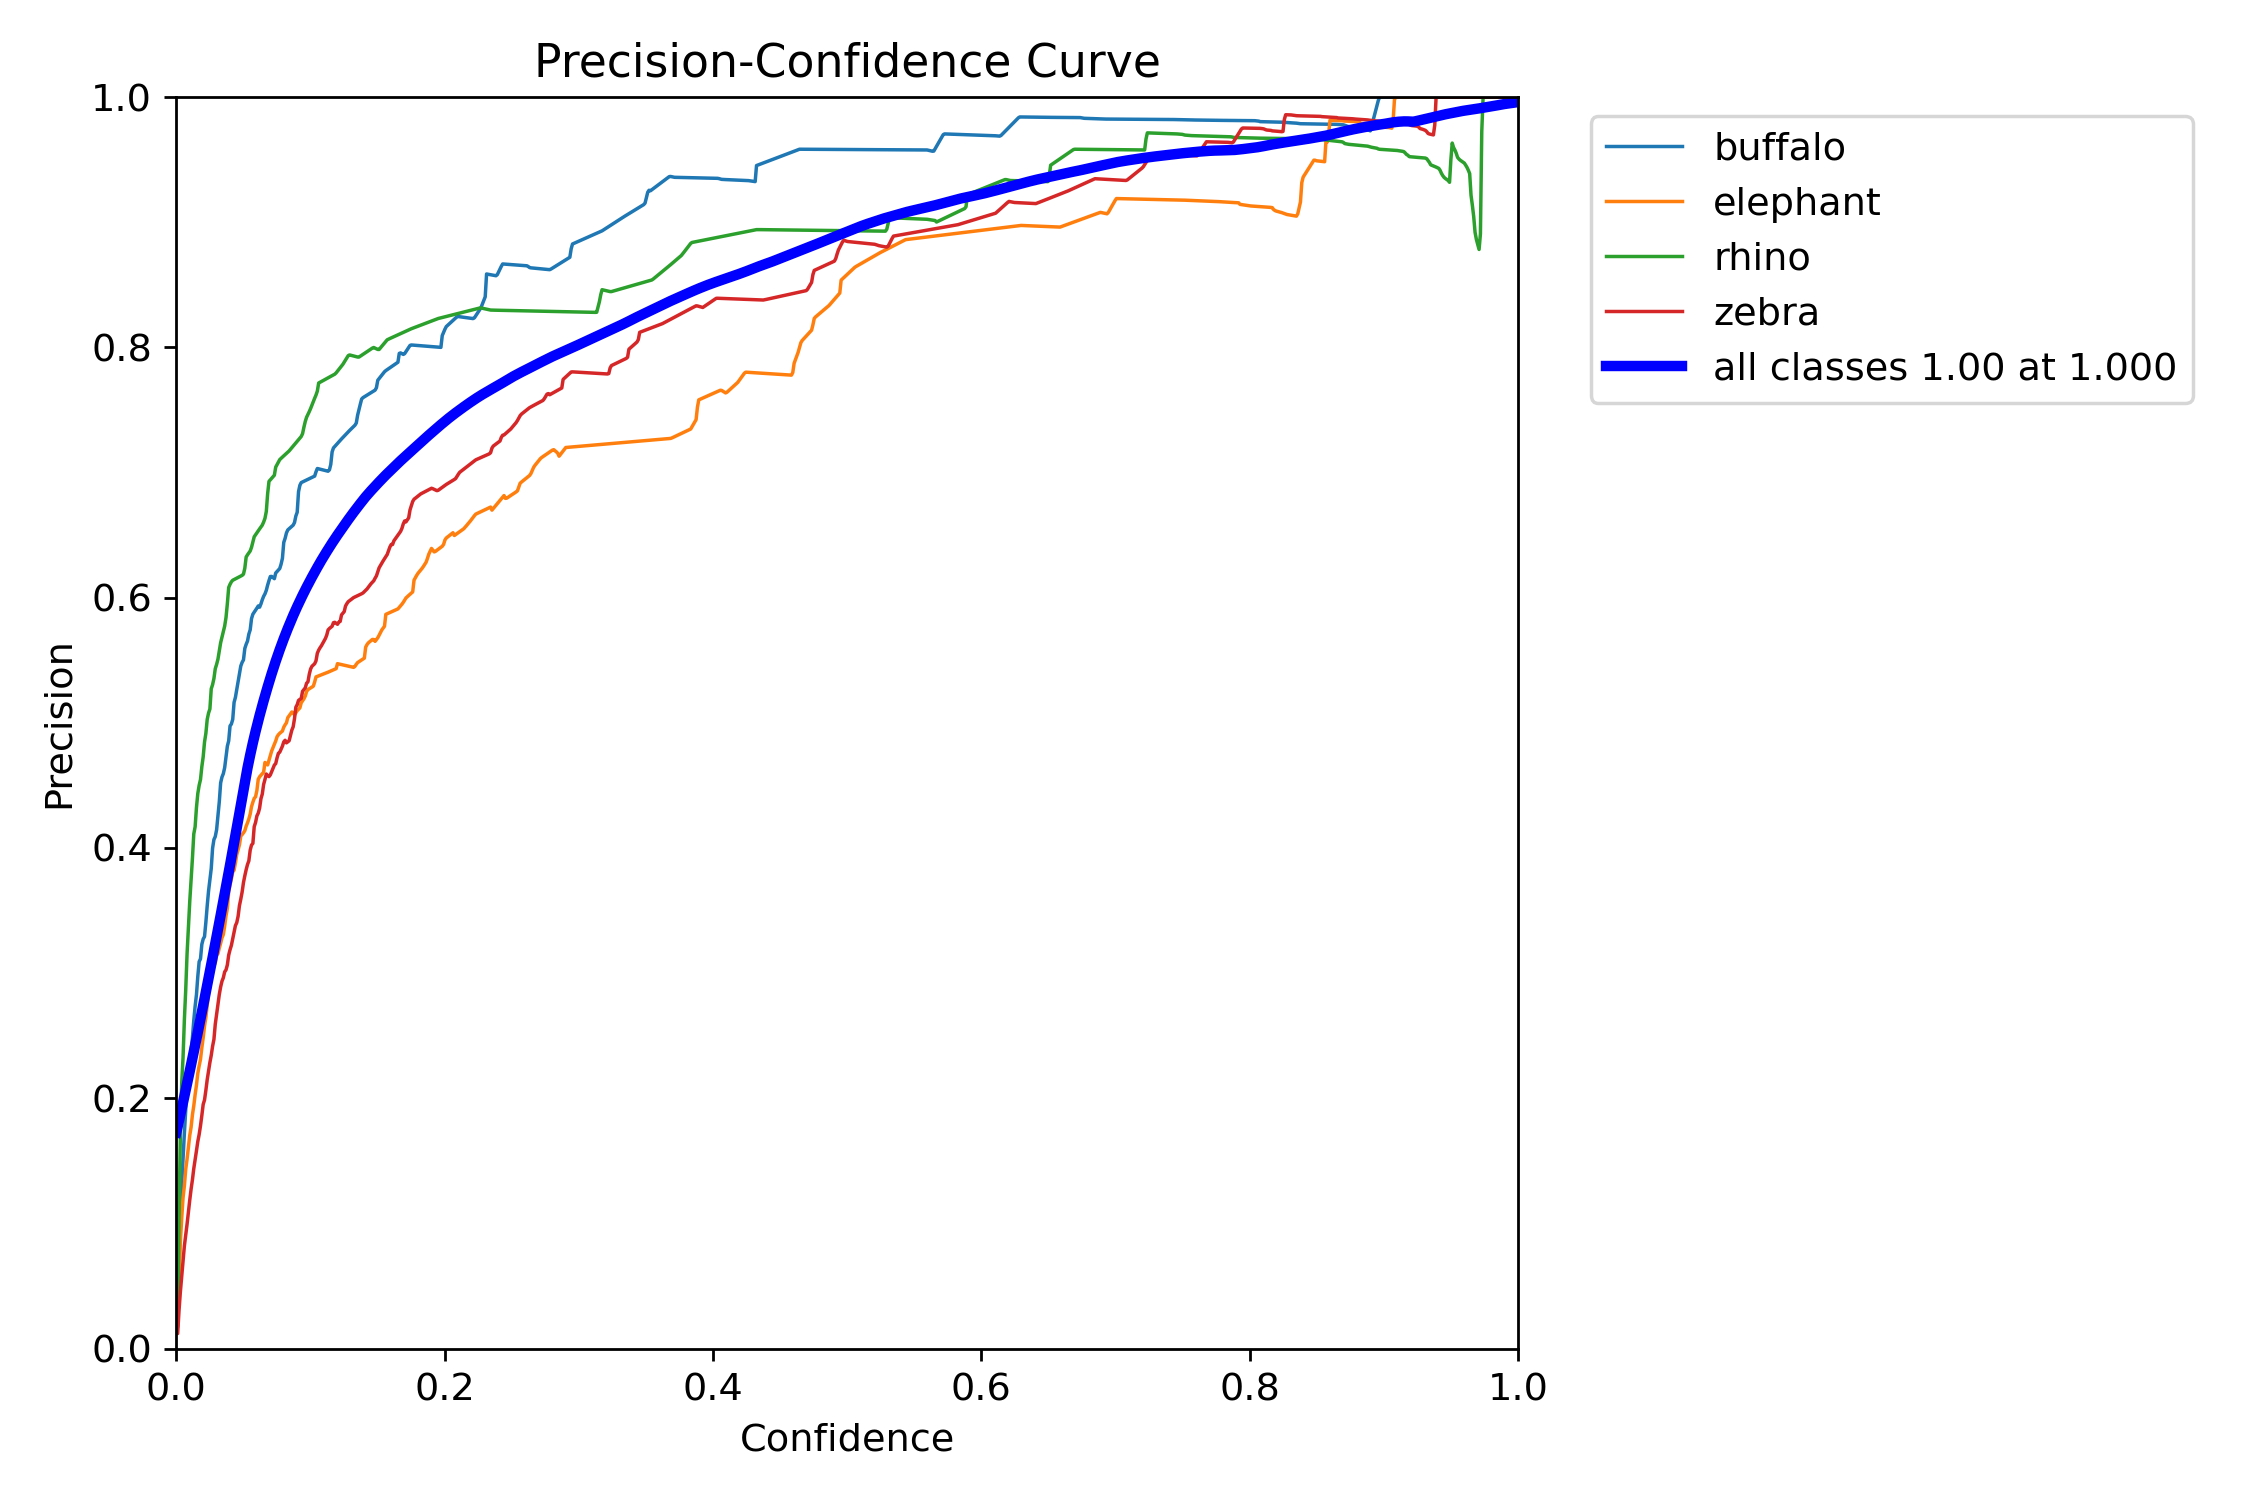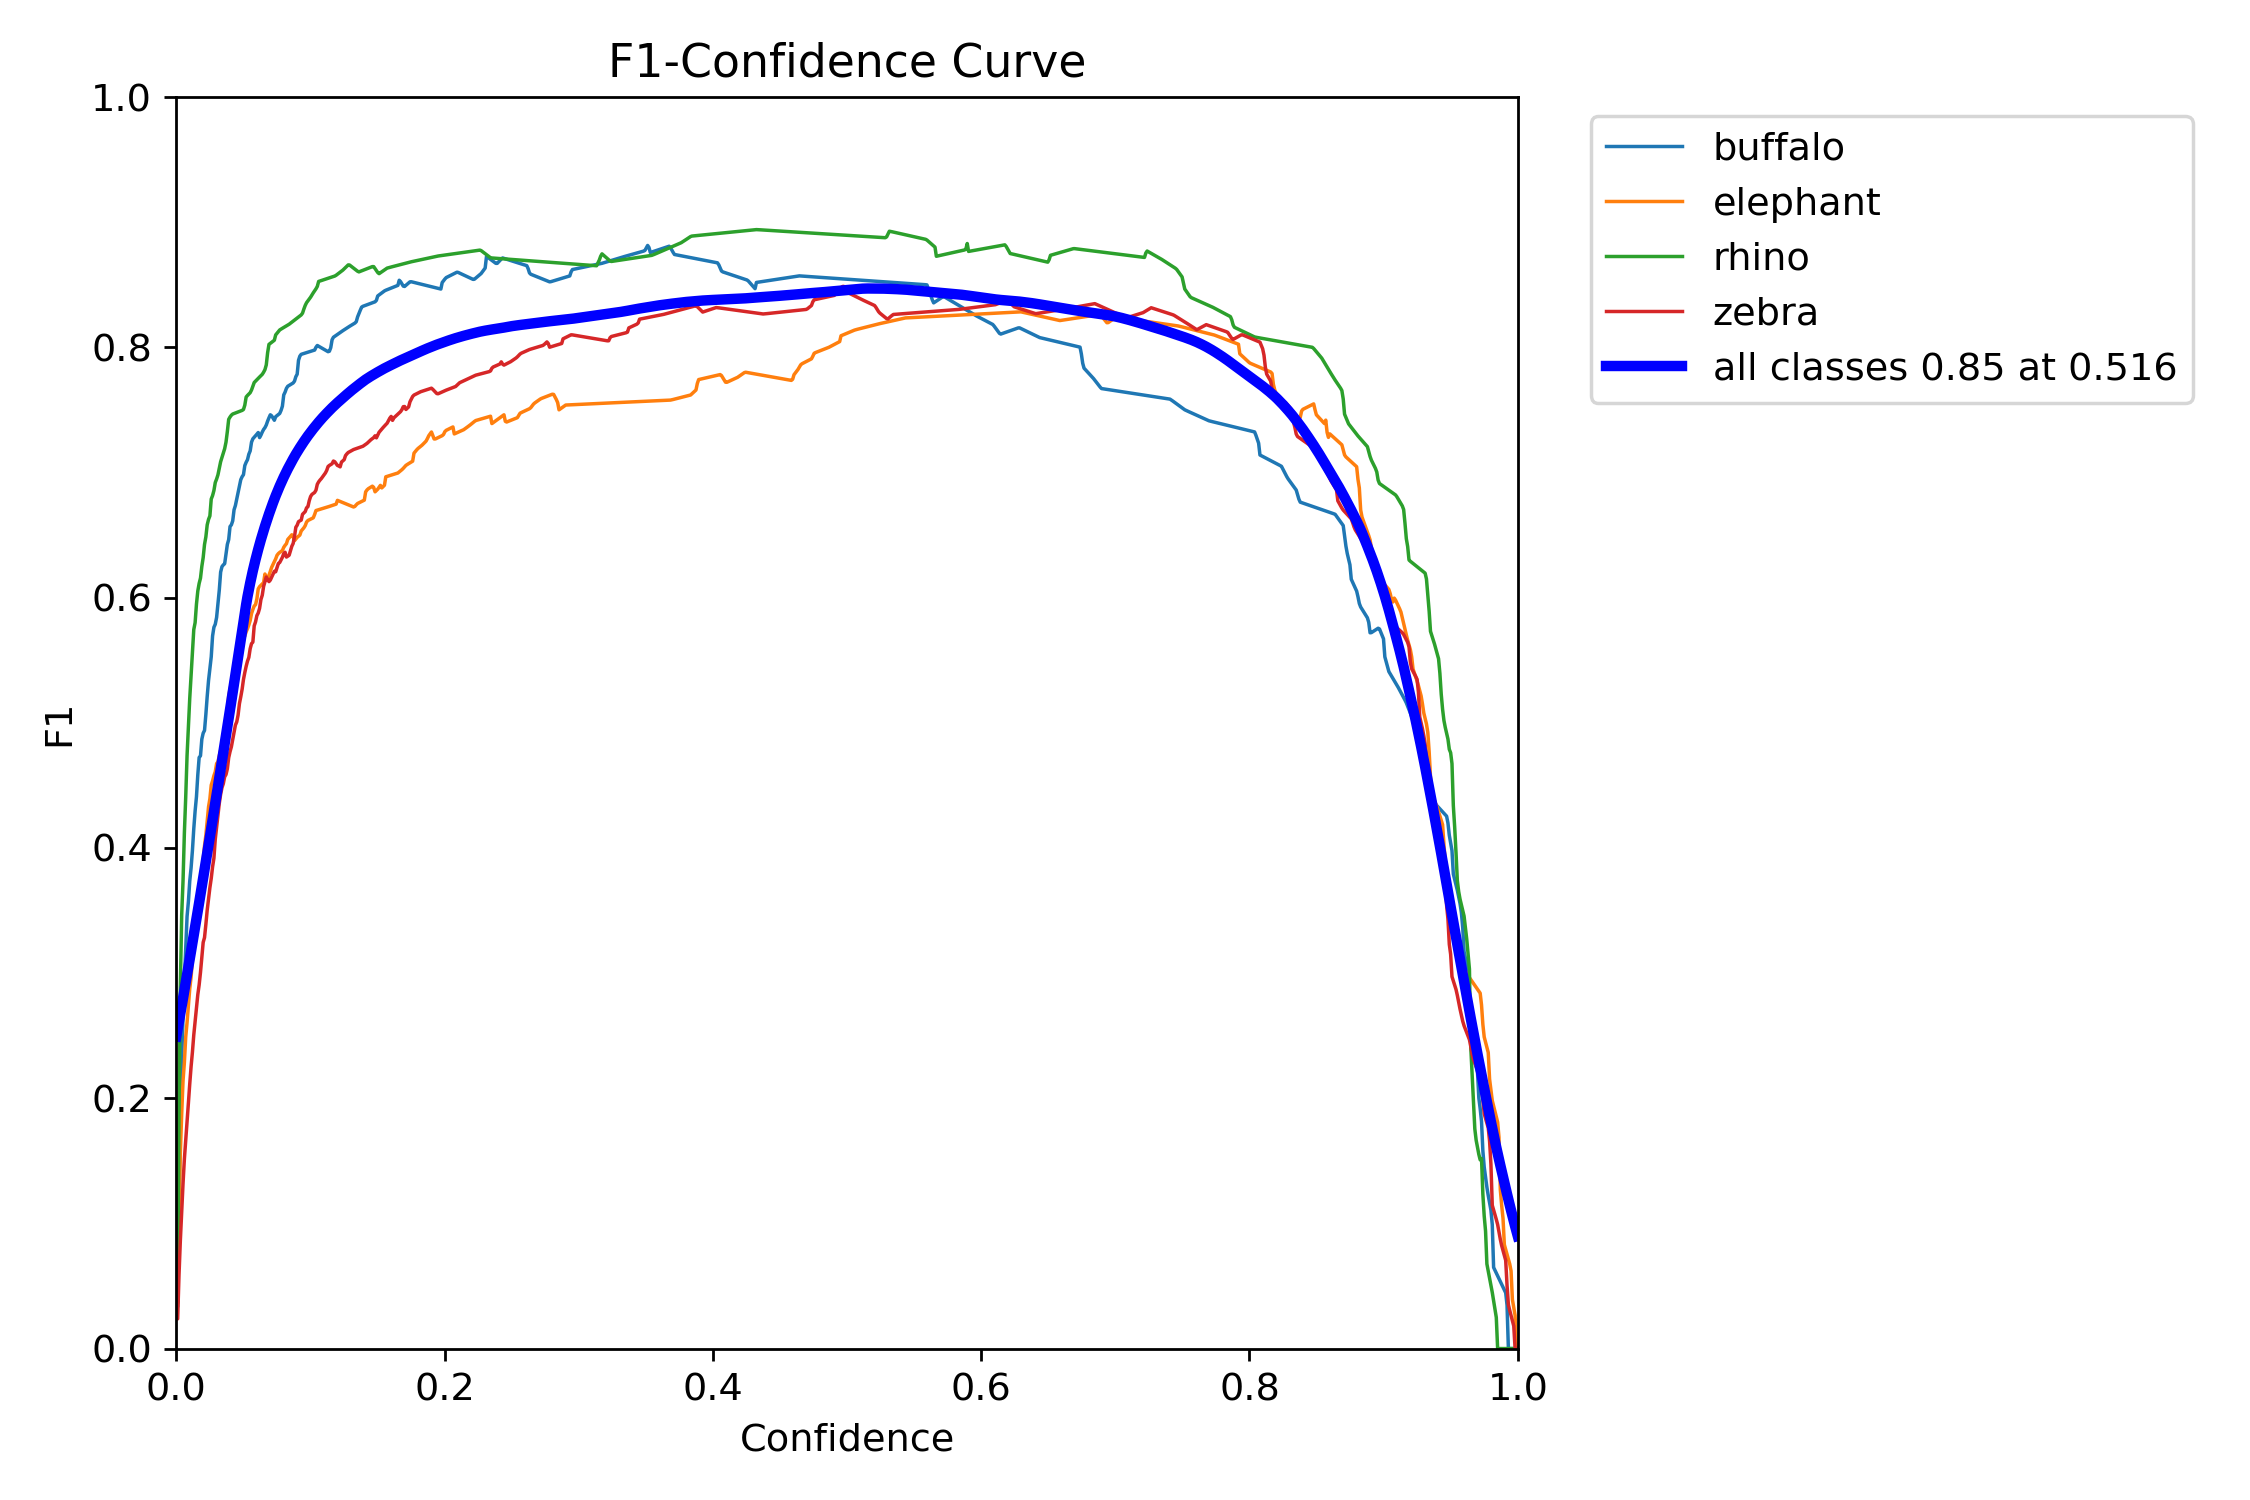